## Stock Market Prediction and Forecasting Using stacked LSTM

### The steps I am following to complete this project is 
#### 1.Data collection of the stocks -- AAPL
#### 2.Preprocess the dataset into training and testing 
#### 3.Create a stacked LSTM model
#### 4.Predict the test data and plot the output
#### To chek the data [click here](https://finance.yahoo.com/quote/AAPL/history/)

In [2]:
# Data collection
# Using pandas datareader to get the dataset
import pandas_datareader as pdr

In [3]:
# From Tiingo I am importing my entire data
# which is a platform for stock market tools
data=pdr.get_data_tiingo('AAPL',api_key="************************************") #use your own api key to get an access

In [4]:
# now let's have a look into the dataset
data

close      high      low      open  \
symbol date                                                             
AAPL   2015-07-30 00:00:00+00:00  122.37  122.5699  121.710  122.3200   
       2015-07-31 00:00:00+00:00  121.30  122.6425  120.910  122.6000   
       2015-08-03 00:00:00+00:00  118.44  122.5700  117.520  121.5000   
       2015-08-04 00:00:00+00:00  114.64  117.7000  113.250  117.4200   
       2015-08-05 00:00:00+00:00  115.40  117.4400  112.100  112.9500   
...                                  ...       ...      ...       ...   
       2020-07-21 00:00:00+00:00  388.00  397.0000  386.970  396.6900   
       2020-07-22 00:00:00+00:00  389.09  391.9000  386.410  386.7700   
       2020-07-23 00:00:00+00:00  371.38  388.3100  368.039  387.9935   
       2020-07-24 00:00:00+00:00  370.46  371.8800  356.580  363.9500   
       2020-07-27 00:00:00+00:00  379.24  379.6200  373.920  374.8400   

                                     volume    adjClose     adjHigh  \
symbol date                                                           
AAPL   2015-07-30 00:00:00+00:00   33628268  112.766819  112.951031   
       2015-07-31 00:00:00+00:00   42884953  111.780789  113.017934   
       2015-08-03 00:00:00+00:00   69975968  109.145232  112.951123   
       2015-08-04 00:00:00+00:00  124138623  105.643443  108.463304   
       2015-08-05 00:00:00+00:00   98384461  106.343801  108.223708   
...                                     ...         ...         ...   
       2020-07-21 00:00:00+00:00   25627347  388.000000  397.000000   
       2020-07-22 00:00:00+00:00   22250413  389.090000  391.900000   
       2020-07-23 00:00:00+00:00   49251108  371.380000  388.310000   
       2020-07-24 00:00:00+00:00   46359716  370.460000  371.880000   
       2020-07-27 00:00:00+00:00   30303548  379.240000  379.620000   

                                      adjLow     adjOpen  adjVolume  divCash  \
symbol date                                                                    
AAPL   2015-07-30 00:00:00+00:00  112.158613  112.720742   33628268      0.0   
       2015-07-31 00:00:00+00:00  111.421394  112.978769   42884953      0.0   
       2015-08-03 00:00:00+00:00  108.297430  111.965093   69975968      0.0   
       2015-08-04 00:00:00+00:00  104.362525  108.205278  124138623      0.0   
       2015-08-05 00:00:00+00:00  103.302773  104.086068   98384461      0.0   
...                                      ...         ...        ...      ...   
       2020-07-21 00:00:00+00:00  386.970000  396.690000   25627347      0.0   
       2020-07-22 00:00:00+00:00  386.410000  386.770000   22250413      0.0   
       2020-07-23 00:00:00+00:00  368.039000  387.993500   49251108      0.0   
       2020-07-24 00:00:00+00:00  356.580000  363.950000   46359716      0.0   
       2020-07-27 00:00:00+00:00  373.920000  374.840000   30303548      0.0   

                                  splitFactor  
symbol date                                    
AAPL   2015-07-30 00:00:00+00:00          1.0  
       2015-07-31 00:00:00+00:00          1.0  
       2015-08-03 00:00:00+00:00          1.0  
       2015-08-04 00:00:00+00:00          1.0  
       2015-08-05 00:00:00+00:00          1.0  
...                                       ...  
       2020-07-21 00:00:00+00:00          1.0  
       2020-07-22 00:00:00+00:00          1.0  
       2020-07-23 00:00:00+00:00          1.0  
       2020-07-24 00:00:00+00:00          1.0  
       2020-07-27 00:00:00+00:00          1.0  

[1257 rows x 12 columns]

In [5]:
# changing the format of our dataset 
# converting it into a csv file
data.to_csv('AAPL.csv')

In [6]:
# importing pandas here to structurized out dataset into a pandas dataframe
# for further preprocessing steps
import pandas as pd

In [7]:
df=pd.read_csv("AAPL.csv")
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-07-30 00:00:00+00:00,122.37,122.5699,121.710,122.3200,33628268,112.766819,112.951031,112.158613,112.720742,33628268,0.0,1.0
1,AAPL,2015-07-31 00:00:00+00:00,121.30,122.6425,120.910,122.6000,42884953,111.780789,113.017934,111.421394,112.978769,42884953,0.0,1.0
2,AAPL,2015-08-03 00:00:00+00:00,118.44,122.5700,117.520,121.5000,69975968,109.145232,112.951123,108.297430,111.965093,69975968,0.0,1.0
3,AAPL,2015-08-04 00:00:00+00:00,114.64,117.7000,113.250,117.4200,124138623,105.643443,108.463304,104.362525,108.205278,124138623,0.0,1.0
4,AAPL,2015-08-05 00:00:00+00:00,115.40,117.4400,112.100,112.9500,98384461,106.343801,108.223708,103.302773,104.086068,98384461,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,AAPL,2020-07-21 00:00:00+00:00,388.00,397.0000,386.970,396.6900,25627347,388.000000,397.000000,386.970000,396.690000,25627347,0.0,1.0
1253,AAPL,2020-07-22 00:00:00+00:00,389.09,391.9000,386.410,386.7700,22250413,389.090000,391.900000,386.410000,386.770000,22250413,0.0,1.0
1254,AAPL,2020-07-23 00:00:00+00:00,371.38,388.3100,368.039,387.9935,49251108,371.380000,388.310000,368.039000,387.993500,49251108,0.0,1.0
1255,AAPL,2020-07-24 00:00:00+00:00,370.46,371.8800,356.580,363.9500,46359716,370.460000,371.880000,356.580000,363.950000,46359716,0.0,1.0


### We can see the change between the previous dataset with other format and our present dataset  with csv format

In [8]:
## now I am going to do some preprocessing steps to prepare the dataset to feed it into the model

In [9]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-07-30 00:00:00+00:00,122.37,122.5699,121.71,122.32,33628268,112.766819,112.951031,112.158613,112.720742,33628268,0.0,1.0
1,AAPL,2015-07-31 00:00:00+00:00,121.30,122.6425,120.91,122.60,42884953,111.780789,113.017934,111.421394,112.978769,42884953,0.0,1.0
2,AAPL,2015-08-03 00:00:00+00:00,118.44,122.5700,117.52,121.50,69975968,109.145232,112.951123,108.297430,111.965093,69975968,0.0,1.0
3,AAPL,2015-08-04 00:00:00+00:00,114.64,117.7000,113.25,117.42,124138623,105.643443,108.463304,104.362525,108.205278,124138623,0.0,1.0
4,AAPL,2015-08-05 00:00:00+00:00,115.40,117.4400,112.10,112.95,98384461,106.343801,108.223708,103.302773,104.086068,98384461,0.0,1.0


In [10]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2020-07-21 00:00:00+00:00,388.00,397.00,386.970,396.6900,25627347,388.00,397.00,386.970,396.6900,25627347,0.0,1.0
1253,AAPL,2020-07-22 00:00:00+00:00,389.09,391.90,386.410,386.7700,22250413,389.09,391.90,386.410,386.7700,22250413,0.0,1.0
1254,AAPL,2020-07-23 00:00:00+00:00,371.38,388.31,368.039,387.9935,49251108,371.38,388.31,368.039,387.9935,49251108,0.0,1.0
1255,AAPL,2020-07-24 00:00:00+00:00,370.46,371.88,356.580,363.9500,46359716,370.46,371.88,356.580,363.9500,46359716,0.0,1.0
1256,AAPL,2020-07-27 00:00:00+00:00,379.24,379.62,373.920,374.8400,30303548,379.24,379.62,373.920,374.8400,30303548,0.0,1.0


In [11]:
# now I am doing he stock prediction for the "close" but it can be done by other attributes as well 
df1=df.reset_index()['close'] # extracted all the information of the perticular "close" column for the further uses
df1[1200:]

1200    300.63
1201    303.74
1202    310.13
1203    315.01
1204    311.41
1205    307.65
1206    309.54
1207    307.71
1208    314.96
1209    313.14
1210    319.23
1211    316.85
1212    318.89
1213    316.73
1214    318.11
1215    318.25
1216    317.94
1217    321.85
1218    323.34
1219    325.12
1220    322.32
1221    331.50
1222    333.46
1223    343.99
1224    352.84
1225    335.90
1226    338.80
1227    342.99
1228    352.08
1229    351.59
1230    351.73
1231    349.72
1232    358.87
1233    366.53
1234    360.06
1235    364.84
1236    353.63
1237    361.78
1238    364.80
1239    364.11
1240    364.11
1241    373.85
1242    372.69
1243    381.37
1244    383.01
1245    383.68
1246    381.91
1247    388.23
1248    390.90
1249    386.09
1250    385.31
1251    393.43
1252    388.00
1253    389.09
1254    371.38
1255    370.46
1256    379.24
Name: close, dtype: float64

In [12]:
df1.shape

(1257,)

In [13]:
# now let's check the ups and downs upto 2020 in stock prices of APPLE
# importing matplotlib library for visualization
import matplotlib.pyplot as plt

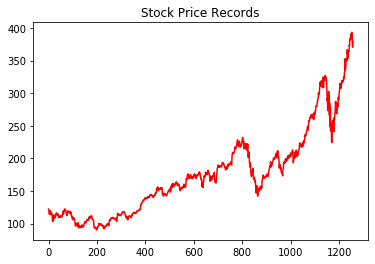

In [14]:
plt.title("Stock Price Records")
plt.plot(df1,"r-") # it's showing the ups and downs of the stock price and 
## we can see the maximize stock price is between 350 to 400 for this year till now

In [15]:
# LSTM are very sensitive about scaling the data.
# let's scale our data first to use MinMax Scaler

In [16]:
import numpy as np

In [19]:
# The sklearn.preprocessing package provides several common utility functions and transformer classes to change 
#raw feature vector into a representation that is more suitable for the downstream estimators.
from sklearn.preprocessing import MinMaxScaler

In [24]:
# I am going to scale up the data in the range (0,1)
scale=MinMaxScaler(feature_range=(0,1))
df1=scale.fit_transform(np.array(df1).reshape(-1,1))

In [29]:
# now we can see the change between previous df1 & current df1
# now df1 got change into an array format 
# so that now I can use this for further calculations
df1 
print(type(df1))

<class 'numpy.ndarray'>


In [28]:
df1.shape

(1257, 1)

#### Now it's time to split our data for training and testing .While doing this step I had to take care of the category of my dataset.Here I basically use a real time series stock price dataset where everyday's stock price is dependent upon it's previous days stock prices.So train test will be continuous here .I am using 70% of my dataset as for the training and remaining 30% for the testing.

In [86]:
training_size=int(len(df1)*0.65)
testing_size=len(df1)-training_size

In [87]:
training_size,testing_size

(817, 440)

In [88]:
training_data=df1[0:training_size]
training_data[0:10] #scaled train data to fit it into the model to learn it

array([[0.10567818],
       [0.10214788],
       [0.09271174],
       [0.08017421],
       [0.08268171],
       [0.08179089],
       [0.08307763],
       [0.0969349 ],
       [0.07637995],
       [0.08215382]])

In [89]:
testing_data=df1[training_size:len(df1)]
testing_data[0:10] #scaled test data for testing the model output

array([[0.42713385],
       [0.41558613],
       [0.40219077],
       [0.40568808],
       [0.42403247],
       [0.43511828],
       [0.38648586],
       [0.36705269],
       [0.37424527],
       [0.39463526]])

Now I will do some data preprocessing steps


In [90]:
# now converting the arrays into a proper dataset matrix
def creat_dataset_matrix(dataset,time_step=1):
    X_data,Y_data=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        X_data.append(a)
        Y_data.append(dataset[i+time_step,0])
    return np.array(X_data),np.array(Y_data)

In [91]:
#time step = it will take previous stock prices into account 
# no of time step = n means it will have a record of previous n stock prices
time_step=100
X_train,y_train=creat_dataset_matrix(training_data,time_step)
X_test,y_test=creat_dataset_matrix(testing_data,time_step)

In [92]:
print(X_train)

[[0.10567818 0.10214788 0.09271174 ... 0.06928635 0.06149988 0.0517668 ]
 [0.10214788 0.09271174 0.08017421 ... 0.06149988 0.0517668  0.05605596]
 [0.09271174 0.08017421 0.08268171 ... 0.0517668  0.05605596 0.05572602]
 ...
 [0.32056485 0.31848626 0.32960507 ... 0.43488733 0.43171995 0.41466231]
 [0.31848626 0.32960507 0.33485103 ... 0.43171995 0.41466231 0.42551717]
 [0.32960507 0.33485103 0.33973407 ... 0.41466231 0.42551717 0.4299383 ]]


In [93]:
print(X_train.shape,y_train.shape)

(716, 100) (716,)


In [94]:
print(X_test.shape,y_test.shape)

(339, 100) (339,)


In [95]:
#now all inputs are reshaped for fed these into our LSTM model
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [96]:
X_train.shape,X_test.shape
# these are reshaped 

((716, 100, 1), (339, 100, 1))

In [97]:
# creating our stack LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [98]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [99]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [100]:
# fitting the data to the LSTM model

model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Train on 716 samples, validate on 339 samples
Epoch 1/100
716/716 [==============================] - 6s 9ms/sample - loss: 0.0171 - val_loss: 0.0447
Epoch 2/100
716/716 [==============================] - 2s 3ms/sample - loss: 0.0032 - val_loss: 0.0036
Epoch 3/100
716/716 [==============================] - 2s 3ms/sample - loss: 9.0243e-04 - val_loss: 0.0038
Epoch 4/100
716/716 [==============================] - 2s 3ms/sample - loss: 6.4655e-04 - val_loss: 0.0030
Epoch 5/100
716/716 [==============================] - 2s 3ms/sample - loss: 4.3365e-04 - val_loss: 0.0038
Epoch 6/100
716/716 [==============================] - 2s 3ms/sample - loss: 3.9875e-04 - val_loss: 0.0032
Epoch 7/100
716/716 [==============================] - 2s 3ms/sample - loss: 3.9381e-04 - val_loss: 0.0031
Epoch 8/100
716/716 [==============================] - 2s 3ms/sample - loss: 3.8584e-04 - val_loss: 0.0029
Epoch 9/100
716/716 [==============================] - 2s 3ms/sample - loss: 3.8417e-04 - val_loss: 0.0027

In [101]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [102]:
##Transformback to original form
train_predict=scale.inverse_transform(train_predict)
test_predict=scale.inverse_transform(test_predict)

In [109]:
test_predict

array([[0.3252807 ],
       [0.3293637 ],
       [0.33000255],
       [0.32682273],
       [0.322729  ],
       [0.31952834],
       [0.31854048],
       [0.32013586],
       [0.3247664 ],
       [0.33138433],
       [0.3381362 ],
       [0.34422064],
       [0.35046086],
       [0.35547814],
       [0.35920691],
       [0.3604332 ],
       [0.3596152 ],
       [0.35798717],
       [0.35641608],
       [0.35763752],
       [0.36127973],
       [0.3660956 ],
       [0.37230024],
       [0.37806547],
       [0.38105875],
       [0.3808418 ],
       [0.37888494],
       [0.37418926],
       [0.3745726 ],
       [0.37846723],
       [0.38509297],
       [0.38997334],
       [0.38872355],
       [0.3834161 ],
       [0.37584338],
       [0.3666665 ],
       [0.35170275],
       [0.3373459 ],
       [0.3285389 ],
       [0.32518566],
       [0.3252371 ],
       [0.32375646],
       [0.32280356],
       [0.32064304],
       [0.31612614],
       [0.3103484 ],
       [0.30455798],
       [0.299

In [103]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict)) # we can see loss is very low

0.010671127058628221

In [104]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))  # now we will visualize how our train and test data fits

0.02736265013110169

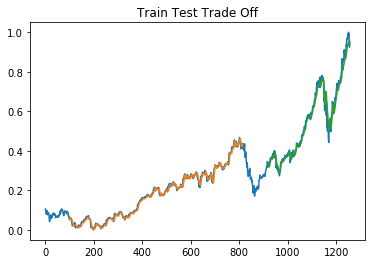

In [111]:

### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.title("Train Test Trade Off")
plt.plot(scale.inverse_transform(df1))
plt.plot(trainPredictPlot) #plotting the train data
plt.plot(testPredictPlot) #plotting the test data
plt.show()

In [ ]:
# we can see by visualization that our model is predicting the test data well (green coloured line)
#model is ready to predict further stock prices